In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing important libararies

In [2]:
# importing the important libraries 
import numpy as np 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns 

import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
warnings.filterwarnings("ignore")

In [3]:
# Set seed for reproducibility
seed = 123

# Define the directory paths for the training and validation datasets
train_dir = '/kaggle/input/dogs-vs-cats/train'
validation_dir = '/kaggle/input/dogs-vs-cats/test'

# Use the image_dataset_from_directory function to create training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels="inferred",
    label_mode="int",  
    batch_size=32,
    image_size=(256, 256),
    seed=seed
)

# Use the image_dataset_from_directory function to create validation dataset
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=validation_dir,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    seed=seed
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


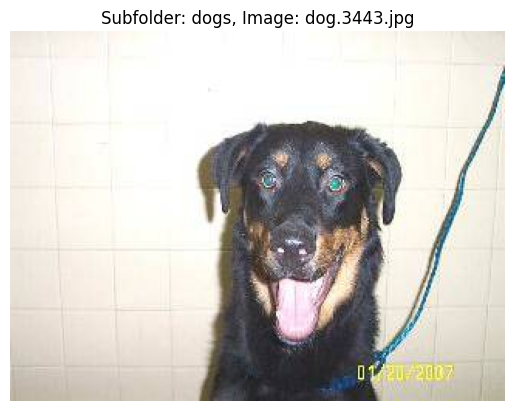

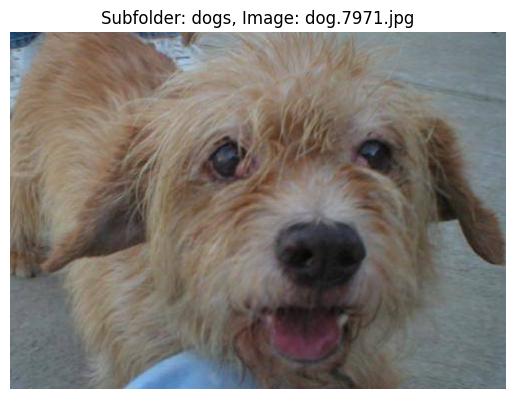

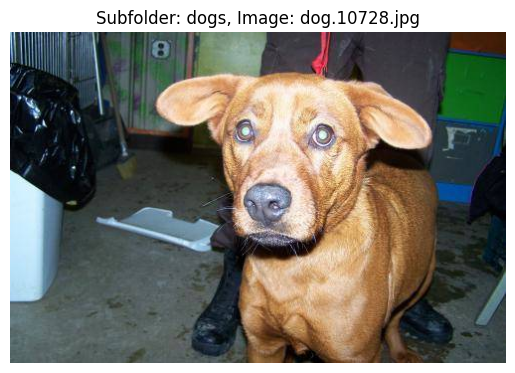

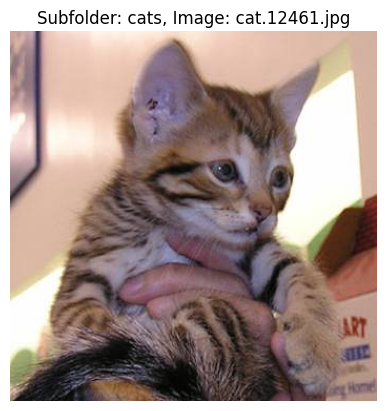

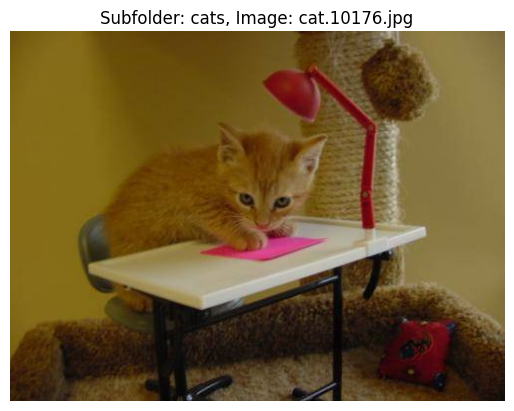

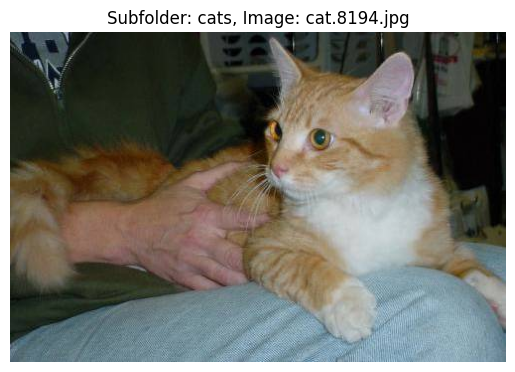

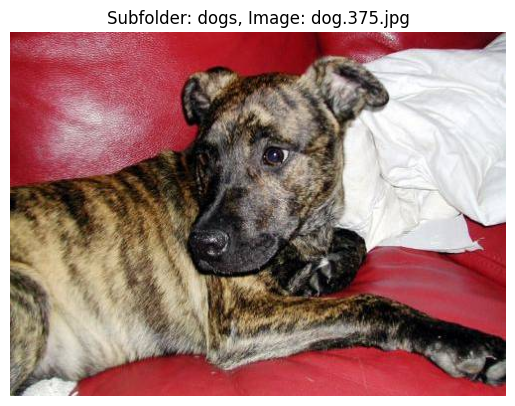

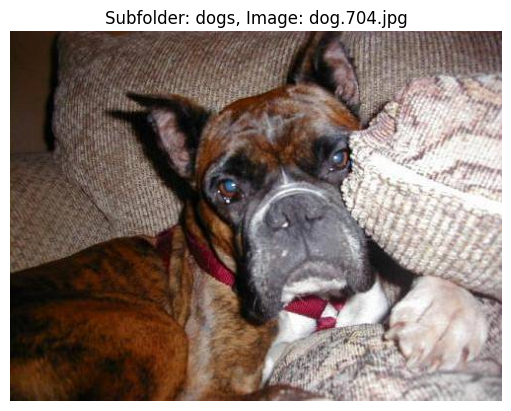

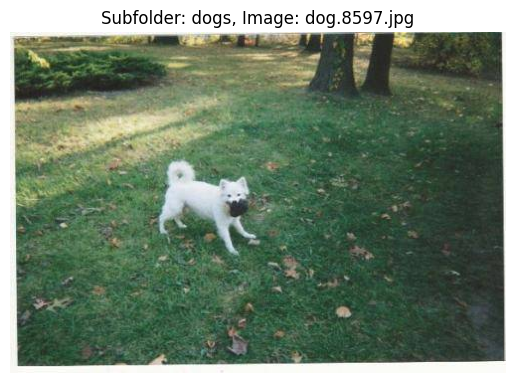

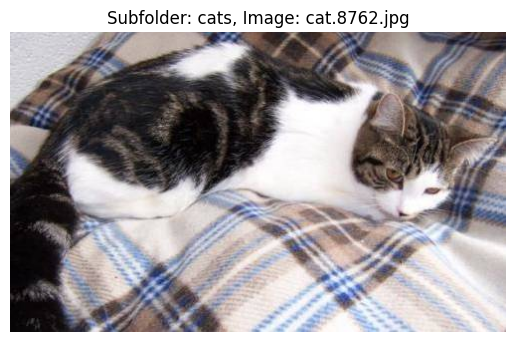

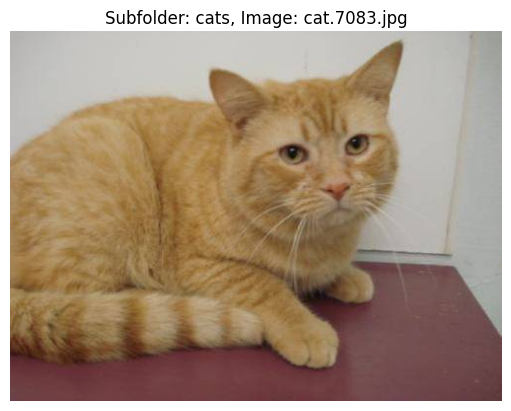

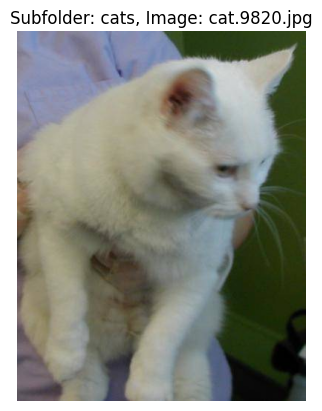

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_folder = '/kaggle/input/dogs-vs-cats/train'

# Display images from each subfolder
for subfolder in os.listdir(train_folder):
    subfolder_path = os.path.join(train_folder, subfolder)
    if os.path.isdir(subfolder_path):
        # Display images from the subfolder
        for image_file in os.listdir(subfolder_path)[:3]:
            image_path = os.path.join(subfolder_path, image_file)
            image = mpimg.imread(image_path)
            plt.imshow(image)
            plt.title(f'Subfolder: {subfolder}, Image: {image_file}')
            plt.axis('off')
            plt.show()
            
test_folder = '/kaggle/input/dogs-vs-cats/test'

# Display images from each subfolder
for subfolder in os.listdir(test_folder):
    subfolder_path = os.path.join(test_folder, subfolder)
    if os.path.isdir(subfolder_path):
        # Display images from the subfolder
        for image_file in os.listdir(subfolder_path)[:3]:
            image_path = os.path.join(subfolder_path, image_file)
            image = mpimg.imread(image_path)
            plt.imshow(image)
            plt.title(f'Subfolder: {subfolder}, Image: {image_file}')
            plt.axis('off')
            plt.show()

In [5]:
# Normalizing the data 
def process(image,label):
    image = tf.cast(image/255, tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
# Get the directory path from the DirectoryIterator object
dataset_path = '/kaggle/input/dogs-vs-cats/train'

# Count the number of subdirectories (classes)
num_classes = len([name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))])

print("Number of classes:", num_classes)

Number of classes: 2


In [7]:
# Define the CNN Model
model_001 = Sequential([
    # Convolutional Block 1
    Conv2D(32, (3, 3), padding='valid', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    
    # Convolutional Block 2
    Conv2D(64, (3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    
    # Convolutional Block 3
    Conv2D(128, (3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    # Fully Connected Layers
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),

    # Output Layer (Binary Classification)
    Dense(1, activation='sigmoid')
])

In [8]:
model_001.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model_001.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

history = model_001.fit(
    train_ds, 
    epochs=100, 
    validation_data=validation_ds,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 107ms/step - accuracy: 0.5653 - loss: 2.7334 - val_accuracy: 0.6362 - val_loss: 0.7010
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.6478 - loss: 0.6209 - val_accuracy: 0.6676 - val_loss: 0.6129
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.7035 - loss: 0.5715 - val_accuracy: 0.7474 - val_loss: 0.5268
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.7611 - loss: 0.4877 - val_accuracy: 0.6430 - val_loss: 0.6778
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.7906 - loss: 0.4349 - val_accuracy: 0.7920 - val_loss: 0.4508
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8243 - loss: 0.3790 - val_accuracy: 0.8076 - val_loss: 0.4402
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8427 - loss: 0.3311 - val_accuracy: 0.7452 - val_loss: 0.5415
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8719 - loss: 

In [13]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model_001.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8131 - loss: 0.4378
Validation Loss: 0.4401961863040924
Validation Accuracy: 0.8076000213623047


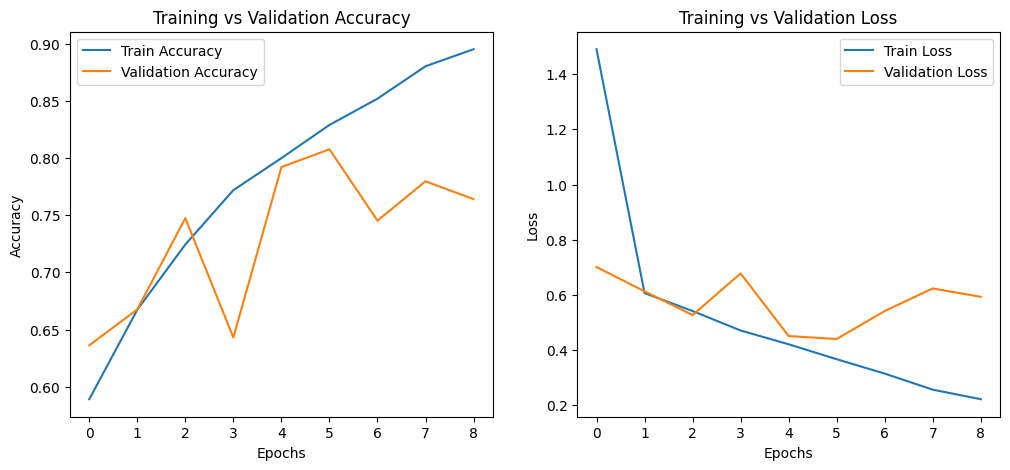

In [14]:
# Plot Training vs Validation Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

In [45]:
import cv2
import numpy as np

def predict_cat_or_dog(model, image_path):
    """
    Predicts whether the given image is a cat or a dog.
    
    Args:
        model: Trained CNN model.
        image_path: Path to the image file.
    
    Returns:
        str: "Cat" if prediction < 0.5, else "Dog".
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        return "Error: Image not found!"

    # Resize to match model's input size
    image = cv2.resize(image, (256, 256))

    # Normalize (scale pixel values between 0 and 1)
    image = image / 255.0

    # Expand dimensions to match model's expected input shape (batch size of 1)
    image = np.expand_dims(image, axis=0)

    # Make prediction
    pred = model.predict(image)

    # Convert prediction to label
    return "This is most probably a Cat 😺" if pred[0][0] < 0.5 else "This is most probably a Dog 🐶"

# Example usage
image_path1 = "/kaggle/input/dogs-vs-cats/test/cats/cat.10086.jpg"
image_path2 = "/kaggle/input/dogs-vs-cats/test/dogs/dog.10102.jpg"
result1 = predict_cat_or_dog(model_001, image_path1)
result2 = predict_cat_or_dog(model_001, image_path2)
print(result1)
print(result2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
This is most probably a Cat 😺
This is most probably a Dog 🐶
